In [7]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pygoogletranslation import Translator

<h1> Data Analysis Mini-project using Pandas & Matplotlib</h1>
<h3>Sudent: Adam Sypnik </h2>
<h3>Album: 136151 </h3>

<h4>Ex1. Read the data and view it.<h4>
<p><b>Important:</b> add the parameter "encoding='latin1', to.pd_read_csv() because the data is in Portuguese.
(‘á’ and ‘ç’ will generate an error).</p>

In [8]:
df = pd.read_csv('Data/amazon.csv', sep=',',encoding='latin1' , na_filter=True,)
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


<h4>Ex2. The months in column "month" are in Portuguese. Change them to English</h4>

In [9]:
# df = df.iloc[20:40]
#
# df

In [10]:
tr = Translator()
# df['month'] = df['month'].apply(lambda x: tr.translate(x,dest='en').text)

In [11]:
print(df['month'].unique())

['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']


In [12]:
# df['month'] = df['month'].apply(lambda x: 'January' if (x == 'Janeiro') else if )

condi = [
                df['month'] == 'Janeiro',
                  df['month'] == 'Fevereiro',
                  df['month'] == 'Março',
                  df['month'] == 'Abril',
                  df['month'] == 'Maio',
                  df['month'] == 'Junho',
                  df['month'] == 'Julho',
                  df['month'] == 'Agosto',
                  df['month'] == 'Setembro',
                  df['month'] == 'Outubro',
                  df['month'] == 'Novembro',
                  df['month'] == 'Dezembro'
                  ]
choices =[
            'January',
            'February',
            'March',
            'April',
            'May',
            'June',
            'July',
            'August',
            'September',
            'October',
            'November',
            'December'
        ]

df['month'] = np.select(condi, choices)

<h4>Ex3. Missing values in state column:
<p>
<ol type="a">
    <li> - randobly delete 200 values from the state column</li>
    <li> - Check for the missing values in this column </li>
    <li> - Fil each missing value with that of the previous (or next) row. </li>
</ol>

<p> Randomly delete 200 values from the state column</p>

In [14]:
i = 0
t = []
while i<200:
    temp = np.random.randint(len(df['state']))
    # print('First temp {}'.format(temp))
    if not pd.isna(df['state'].loc[temp]):
        df['state'].loc[temp] = np.NaN
        i+=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<p> Check for missing values in this column</p>

In [7]:
df.isnull().sum()

year        0
state     200
month       0
number      0
date        0
dtype: int64

In [8]:
temp1 = df[df['state'].isnull() == True].index.tolist()
for i in temp1:
    df['state'].loc[i] = df['state'].loc[i-1]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
df['state'].isnull().sum()

0

<h4>Ex4. Data reduction</h4>
<p>We would like to visualise the number of forest fires over the years, over the months. To this, we need
to be able to identify smaller pieces of the bigger picture.
Let us drop rows from the dataset that are not contributing to the number of forest fires. Therefore,
any row with number column value as 0, must be dropped. We first convert the 0s to NaN and then
drop rows with NaN in the specific column number.

In [10]:
df['number'] = df['number'].apply(lambda x: np.nan if (x == 0) else x)
df = df.dropna()

df.shape

(5837, 5)

In [11]:
temp_arr = df['month'].unique()

test_data = df.groupby(['month']).agg({'number':'sum'})
test_data.index = pd.CategoricalIndex(test_data.index, categories=temp_arr, ordered=True)
test_data.sort_index(inplace = True)
ntemp = test_data.index
test_data.insert(0,'month',ntemp)
test_data.reset_index(drop=True)

,month,number
0,January,47747.844
1,February,30848.050
2,March,30717.405
3,April,28188.770
4,May,34731.363
5,June,56010.675
6,July,92326.113
7,August,88050.435
8,September,58578.305
9,October,88681.579


<BarContainer object of 12 artists>

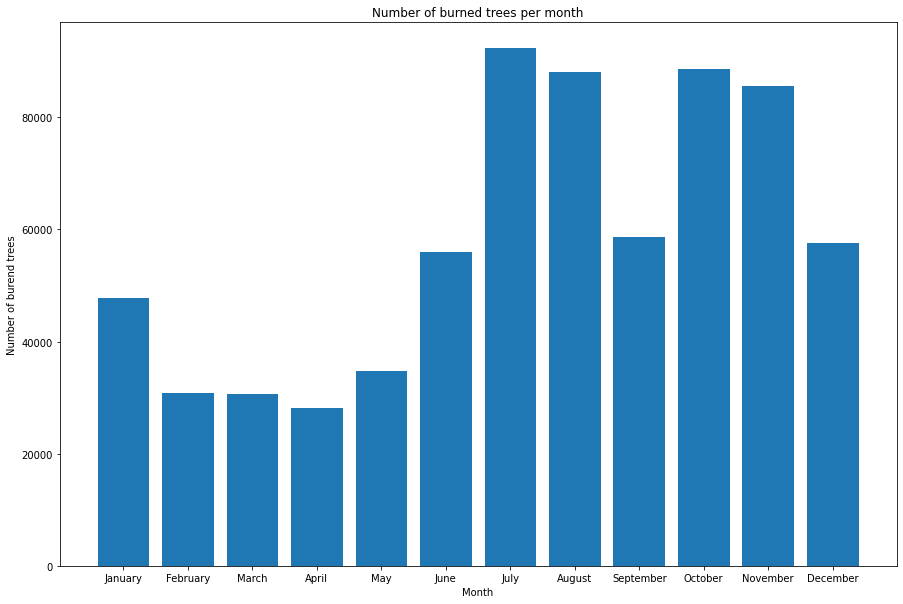

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xlabel('Month')
plt.ylabel('Number of burend trees')
plt.title('Number of burned trees per month')
plt.bar(
    test_data.month,
    test_data.number,
)